In [1]:
import os

In [2]:
os.chdir(r'Downloads')

In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv('red wine quality.csv')

In [7]:
df.shape

(1599, 12)

In [8]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
df_original=df[:]

In [10]:
df.duplicated().sum()

240

In [11]:
print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)

Before (1599, 12)
After (1359, 12)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [13]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [14]:
# Finding outliers
def outlier_analysis(col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    UIF=Q3+1.5*(IQR)# UIF is upper inner fence
    LIF=Q1-1.5*(IQR)# LIF is lower inner fence
    df_out =df[(df[col]<LIF) | (df[col]>UIF)] # A new data set that contains only  potential outliers
    sns.distplot(df_out[col])
   
    return df_out[col] .describe()

In [15]:
# Replacing values bigger than upper outer fence with upper outer fence and values less than lower outer fence with
#lower outer fence
#lower outer fence: Q1 - 3*IQR
#upper outer fence: Q3 + 3*IQR
def fixing_outliers(col):#col is name of column that you want to fix its outliers
    i=0 # i is number of outliers that they are less than lower outer fence
    j=0 # j is  number of outliers that they are bigger than upper outer fence
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    UOF=Q3+3*(IQR)#UOF=upper outer fence
    LOF=Q1-3*(IQR)#LOF=lower outer fence
    Clean_col=[] # Create a list to assign value
    for val in df[col]:#val is value of that column . here we select values of that column one by one and execute the loop
        if val<LOF:   
            Clean_col.append(LOF)# if value is less than LOF we will repalce that with LOF
            i+=1
        elif val>UOF :  # if value is bigger than UOF we will repalce that with UOF 
            Clean_col.append(UOF)
            j+=1
        else : Clean_col.append(val)
    df[col]=Clean_col # update the column by assigning Clean_col
    sns.distplot(df[col])#Plotting univariate distributions
    print('Number of outliers that they are less than lower outer fence: ',i,'\nNumber of outliers that they are bigger than upper outer fence: ',j)
    return df[col] .describe()

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Quality: Target

In [17]:
df['quality'].value_counts().sort_index()

3     10
4     53
5    577
6    535
7    167
8     17
Name: quality, dtype: int64

In [18]:
#Cinverting quality >=7 to good (1) and quality <7 as low(0)
df['quality'] =(df['quality']>= 7).astype(int)  

In [19]:
df['quality'].value_counts() #1: high quality, 0:low quality

0    1175
1     184
Name: quality, dtype: int64

Text(0.5, 1, 'Quality Counts')

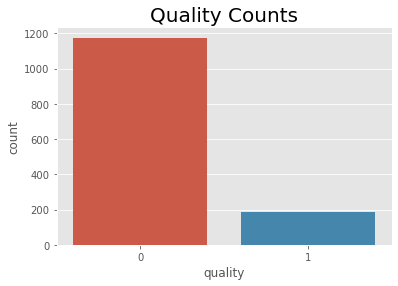

In [20]:
sns.countplot(df['quality'])
plt.title("Quality Counts", y=1, fontdict={"fontsize": 20})

([<matplotlib.patches.Wedge at 0x234ef90d0a0>,
 [Text(-0.4745374357472562, -1.0475276712690784, '0'),
  Text(0.4745374357472564, 1.0475276712690784, '1')],
 [Text(-0.2682168115093187, -0.592080857673827, '86.46%'),
  Text(0.26821681150931875, 0.592080857673827, '13.54%')])

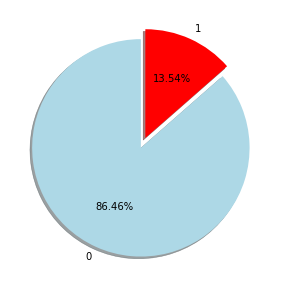

In [21]:
plt.rcParams['figure.figsize']=23,5
plt.subplot(131)
plt.pie(df['quality'].value_counts().values,
        labels=df['quality'].value_counts().index,
        startangle=90,
        colors=['lightblue', 'red'],
        explode=[0.05,0.05],
        shadow=True, autopct='%1.2f%%')

# fixed acidity

In [22]:
df['fixed acidity'].describe()

count    1359.000000
mean        8.310596
std         1.736990
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64

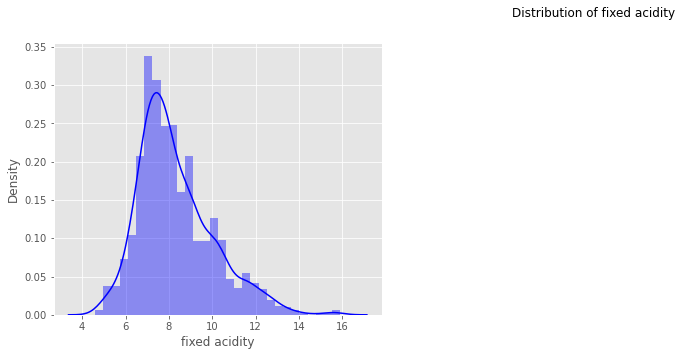

In [23]:
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.distplot(df['fixed acidity'], color='blue')
plt.suptitle('Distribution of fixed acidity')
plt.show()

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

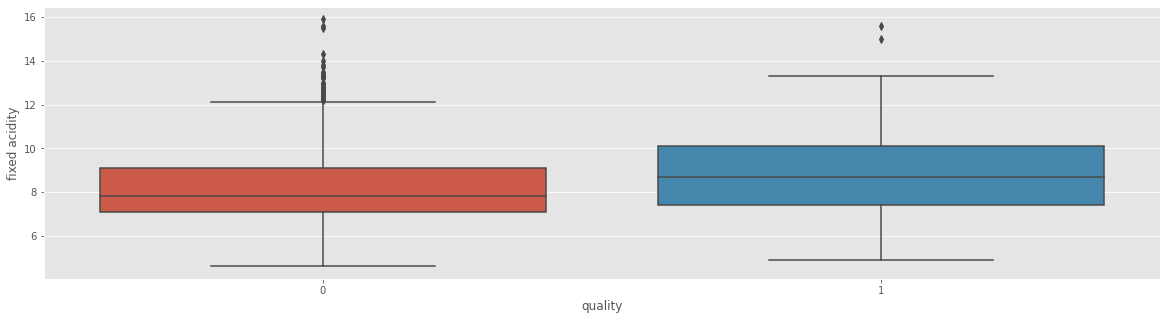

In [24]:
sns.boxplot(data=df, y='fixed acidity', x='quality')

count    41.000000
mean     13.229268
std       0.985455
min      12.400000
25%      12.500000
50%      12.800000
75%      13.400000
max      15.900000
Name: fixed acidity, dtype: float64

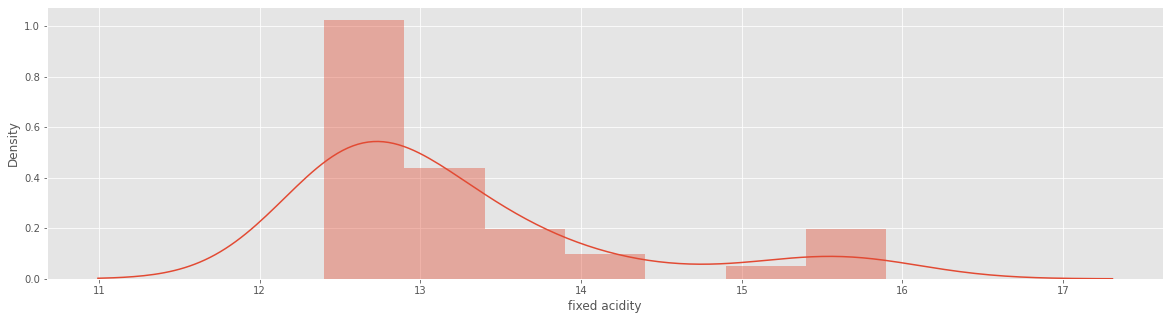

In [25]:
#fixed acidity outliers
outlier_analysis('fixed acidity')

Number of outliers that they are less than lower outer fence:  0 
Number of outliers that they are bigger than upper outer fence:  4


count    1359.000000
mean        8.310155
std         1.735122
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.500000
Name: fixed acidity, dtype: float64

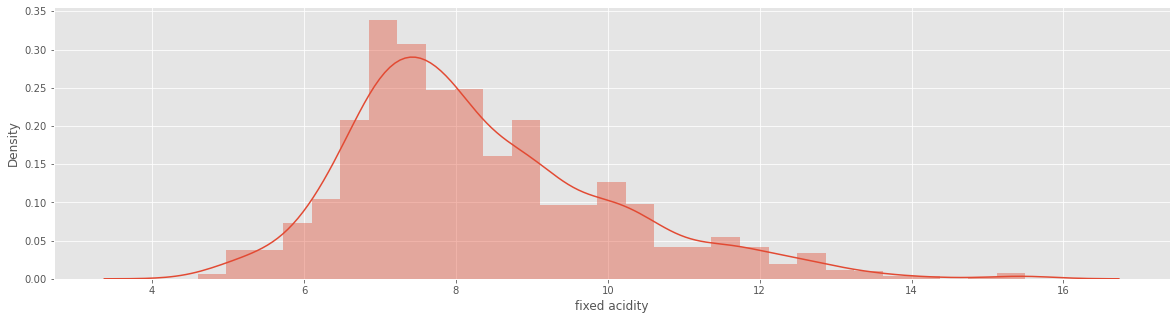

In [26]:
fixing_outliers('fixed acidity')

# volatile acidity

In [27]:
df['volatile acidity'].describe()

count    1359.000000
mean        0.529478
std         0.183031
min         0.120000
25%         0.390000
50%         0.520000
75%         0.640000
max         1.580000
Name: volatile acidity, dtype: float64

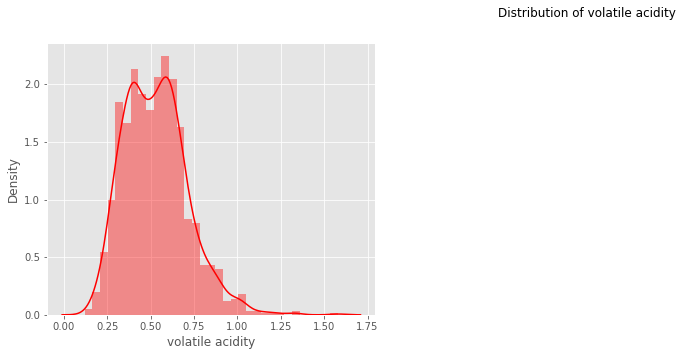

In [28]:
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.distplot(df['volatile acidity'], color='red')
plt.suptitle('Distribution of volatile acidity')
plt.show()

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

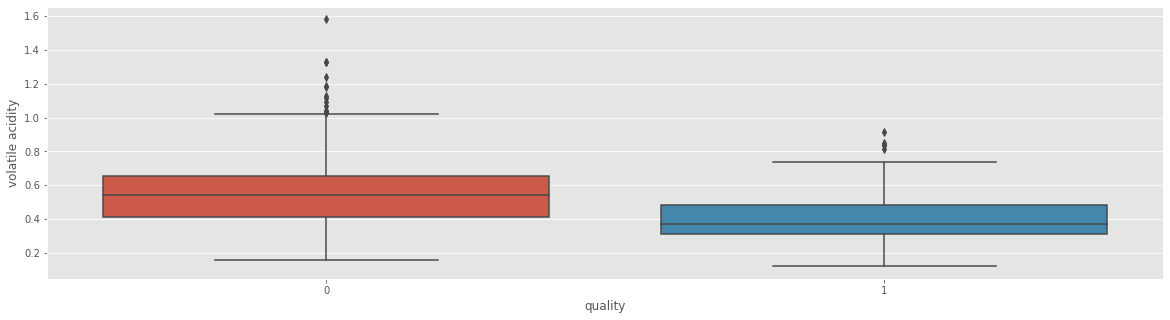

In [29]:
sns.boxplot(data=df, y= 'volatile acidity', x='quality')

count    19.000000
mean      1.132105
std       0.148738
min       1.020000
25%       1.030000
50%       1.070000
75%       1.182500
max       1.580000
Name: volatile acidity, dtype: float64

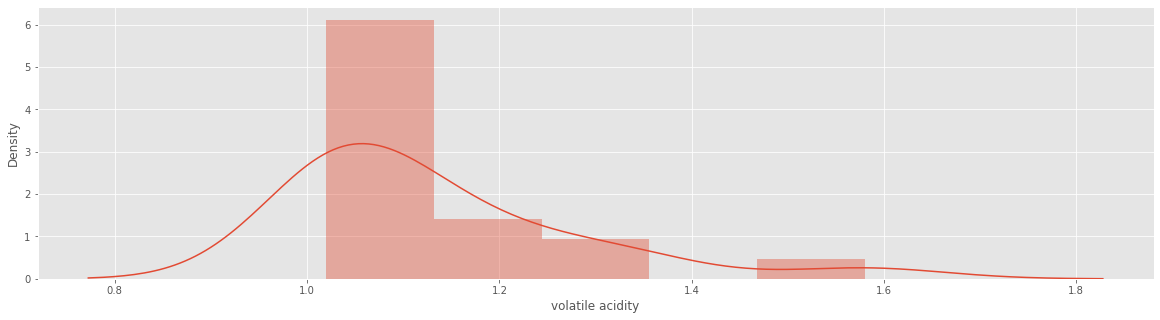

In [30]:
outlier_analysis('volatile acidity')

Number of outliers that they are less than lower outer fence:  0 
Number of outliers that they are bigger than upper outer fence:  1


count    1359.000000
mean        0.529338
std         0.182299
min         0.120000
25%         0.390000
50%         0.520000
75%         0.640000
max         1.390000
Name: volatile acidity, dtype: float64

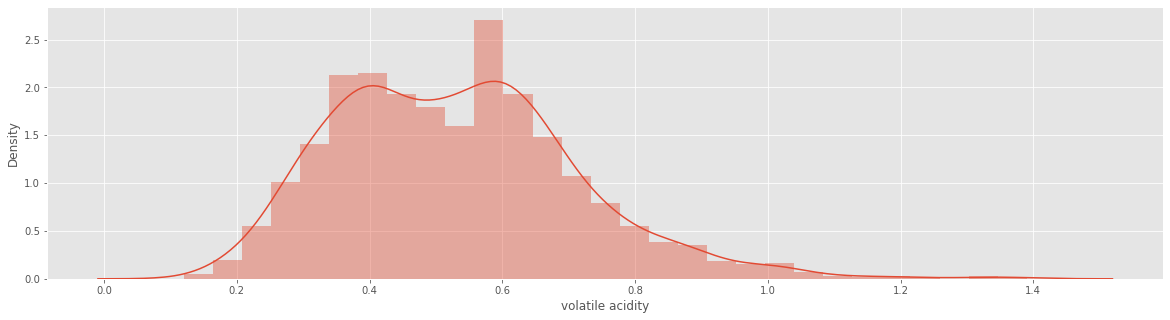

In [31]:
fixing_outliers('volatile acidity')

# citric acid

In [32]:
df['citric acid'].describe()

count    1359.000000
mean        0.272333
std         0.195537
min         0.000000
25%         0.090000
50%         0.260000
75%         0.430000
max         1.000000
Name: citric acid, dtype: float64

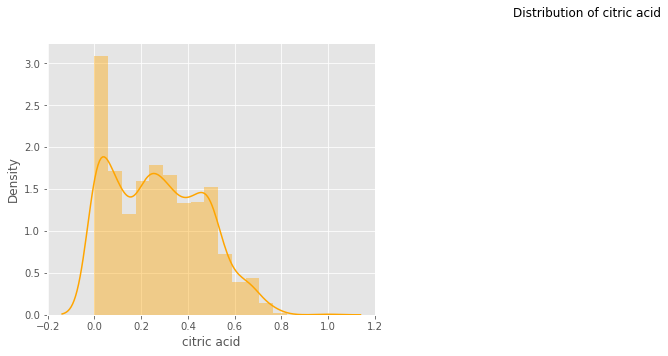

In [33]:
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.distplot(df['citric acid'], color='orange')
plt.suptitle('Distribution of citric acid')
plt.show()

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

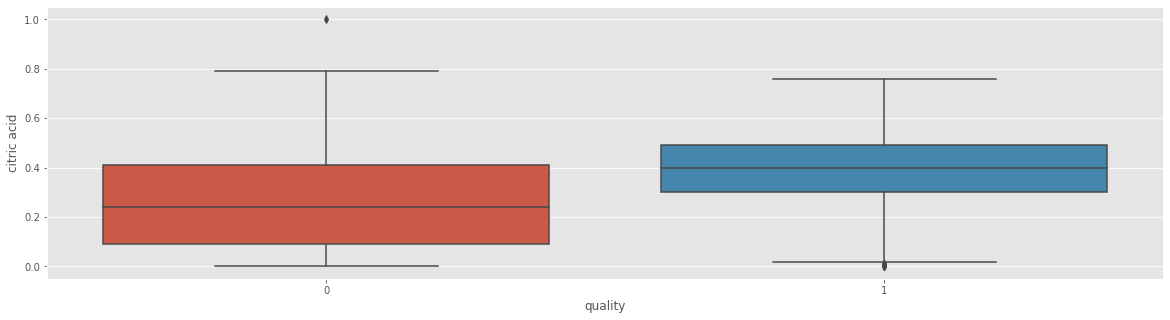

In [34]:
sns.boxplot(data=df, y= 'citric acid', x='quality')

count    1.0
mean     1.0
std      NaN
min      1.0
25%      1.0
50%      1.0
75%      1.0
max      1.0
Name: citric acid, dtype: float64

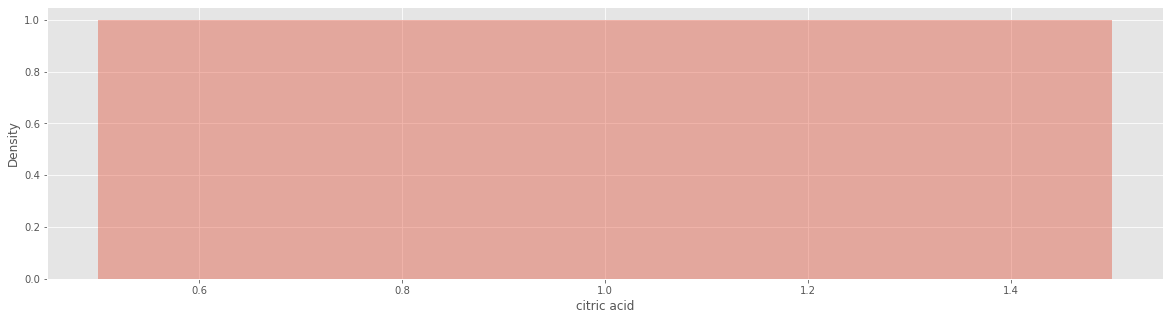

In [35]:
outlier_analysis('citric acid')

Number of outliers that they are less than lower outer fence:  0 
Number of outliers that they are bigger than upper outer fence:  0


count    1359.000000
mean        0.272333
std         0.195537
min         0.000000
25%         0.090000
50%         0.260000
75%         0.430000
max         1.000000
Name: citric acid, dtype: float64

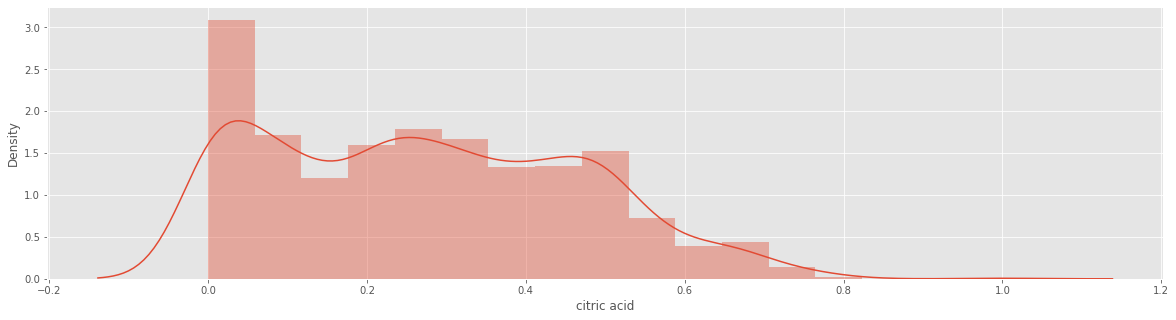

In [36]:
fixing_outliers('citric acid')

# residual sugar

In [37]:
df['residual sugar'].describe()

count    1359.000000
mean        2.523400
std         1.352314
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64

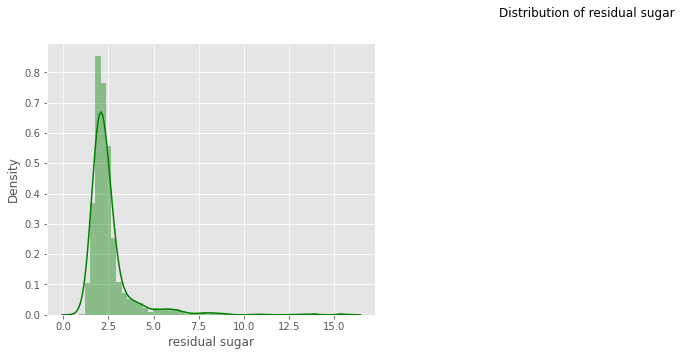

In [38]:
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.distplot(df['residual sugar'], color='green')
plt.suptitle('Distribution of residual sugar')
plt.show()

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

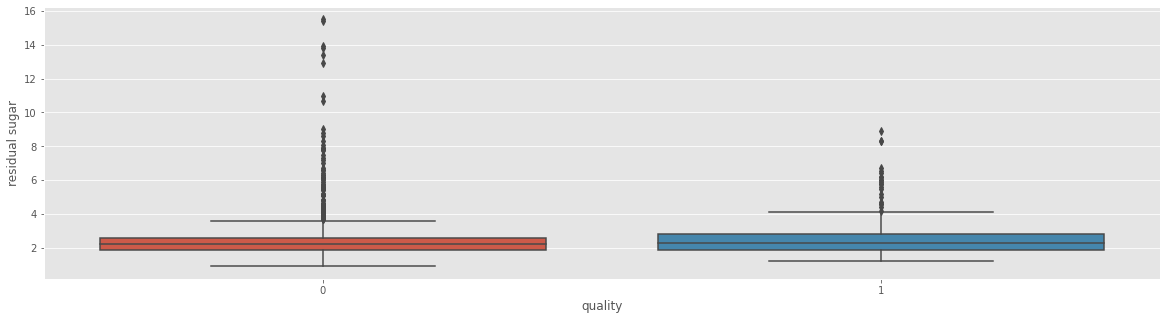

In [39]:
sns.boxplot(data=df, y= 'residual sugar', x='quality')

count    126.000000
mean       5.799603
std        2.426013
min        3.700000
25%        4.200000
50%        5.100000
75%        6.300000
max       15.500000
Name: residual sugar, dtype: float64

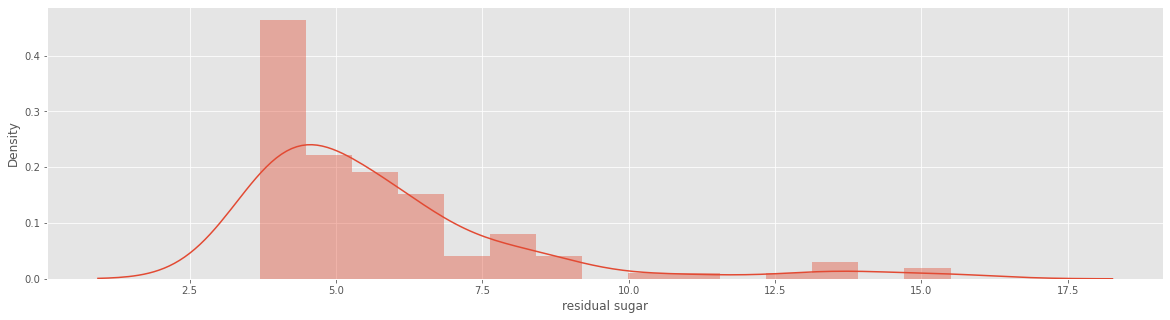

In [40]:
outlier_analysis('residual sugar')

Number of outliers that they are less than lower outer fence:  0 
Number of outliers that they are bigger than upper outer fence:  70


count    1359.000000
mean        2.397940
std         0.793386
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max         4.700000
Name: residual sugar, dtype: float64

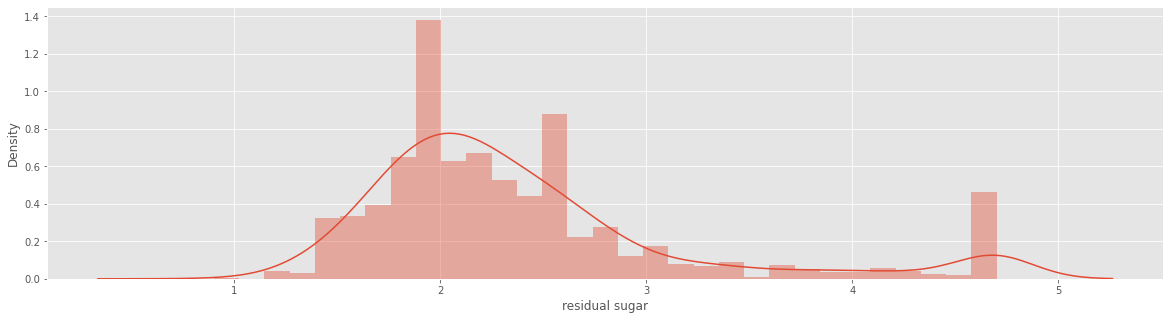

In [41]:
fixing_outliers('residual sugar')

# chlorides

In [42]:
df['chlorides'].describe()

count    1359.000000
mean        0.088124
std         0.049377
min         0.012000
25%         0.070000
50%         0.079000
75%         0.091000
max         0.611000
Name: chlorides, dtype: float64

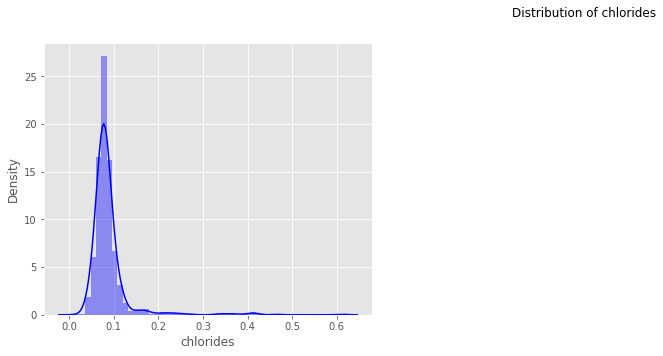

In [43]:
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.distplot(df['chlorides'], color='blue')
plt.suptitle('Distribution of chlorides')
plt.show()

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

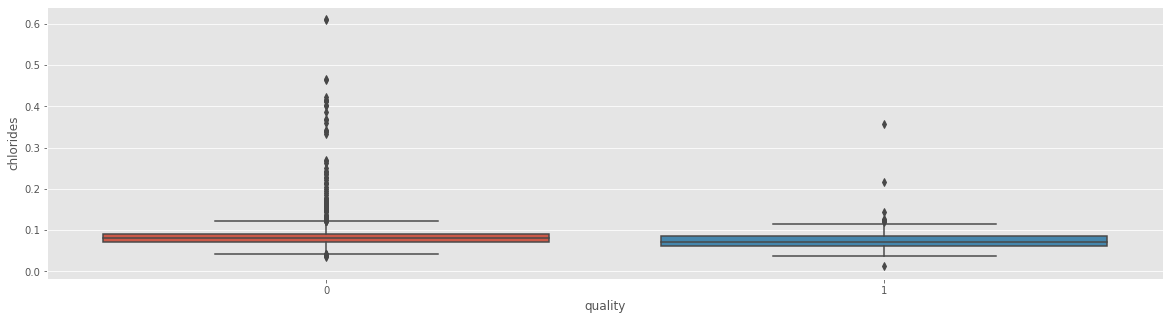

In [44]:
sns.boxplot(data=df, y='chlorides', x='quality')

count    87.000000
mean      0.224862
std       0.121294
min       0.012000
25%       0.146500
50%       0.176000
75%       0.268500
max       0.611000
Name: chlorides, dtype: float64

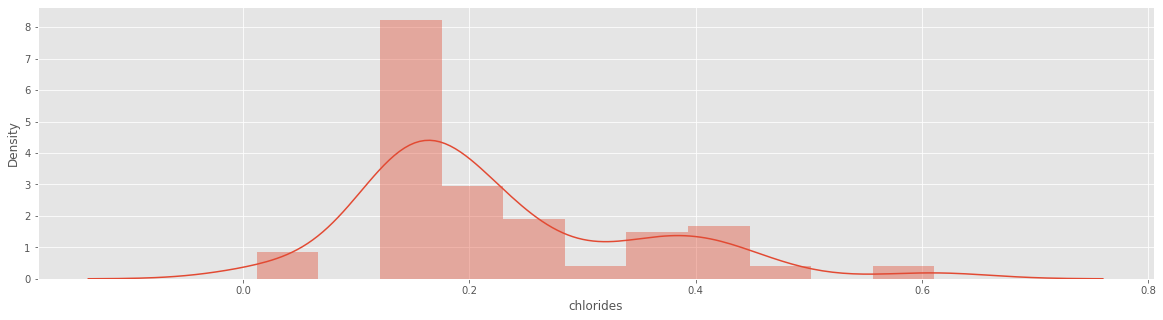

In [45]:
outlier_analysis('chlorides')

Number of outliers that they are less than lower outer fence:  0 
Number of outliers that they are bigger than upper outer fence:  60


count    1359.000000
mean        0.082899
std         0.022846
min         0.012000
25%         0.070000
50%         0.079000
75%         0.091000
max         0.154000
Name: chlorides, dtype: float64

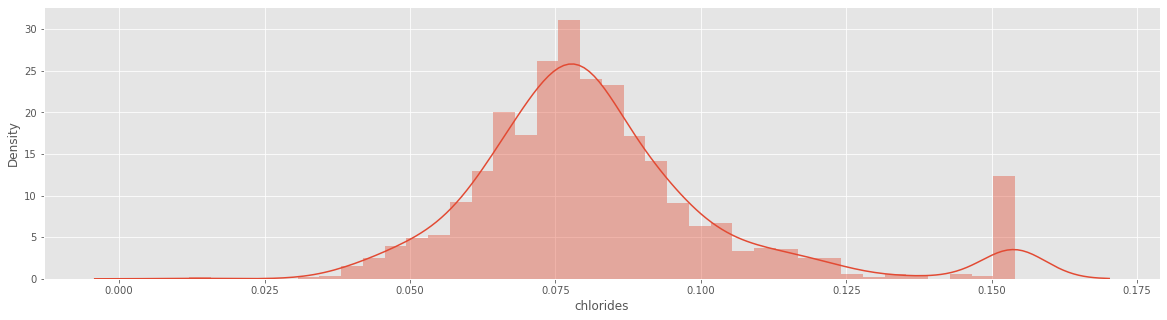

In [46]:
fixing_outliers('chlorides')

# free sulfur dioxide	

In [47]:
 df['free sulfur dioxide'].describe()

count    1359.000000
mean       15.893304
std        10.447270
min         1.000000
25%         7.000000
50%        14.000000
75%        21.000000
max        72.000000
Name: free sulfur dioxide, dtype: float64

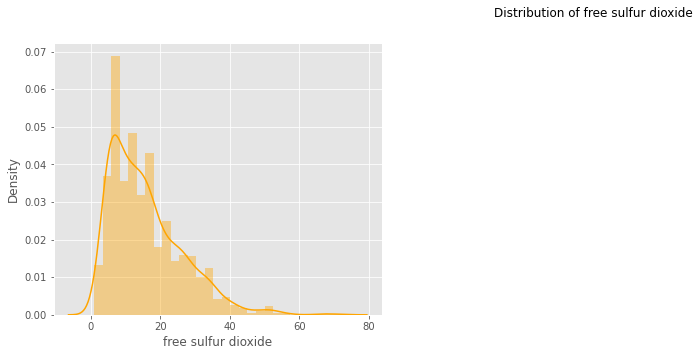

In [48]:
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.distplot(df['free sulfur dioxide'], color='orange')
plt.suptitle('Distribution of free sulfur dioxide')
plt.show()

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

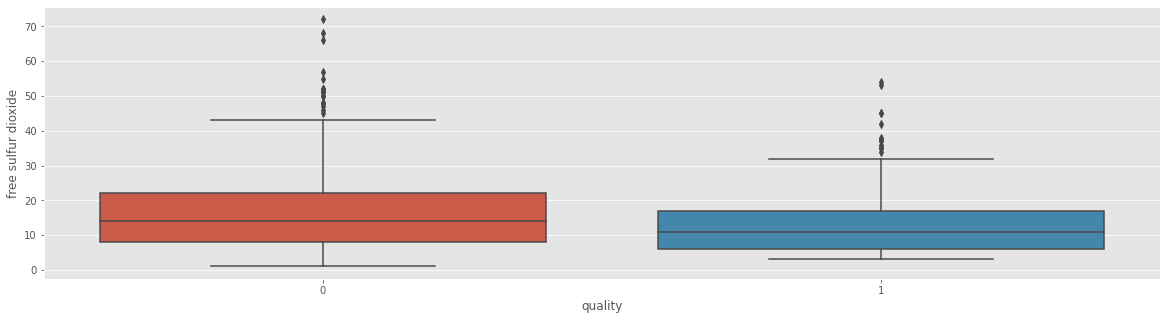

In [49]:
sns.boxplot(data=df, y= 'free sulfur dioxide', x='quality')

count    26.000000
mean     51.346154
std       7.456231
min      43.000000
25%      46.250000
50%      50.500000
75%      52.750000
max      72.000000
Name: free sulfur dioxide, dtype: float64

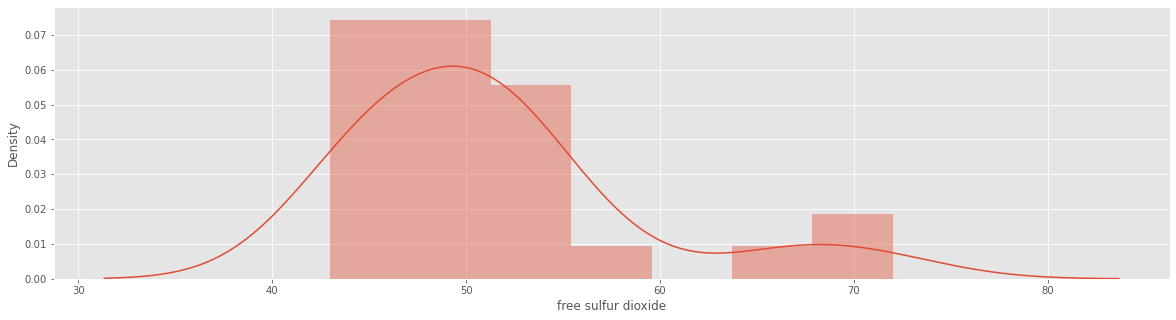

In [50]:
outlier_analysis('free sulfur dioxide')

Number of outliers that they are less than lower outer fence:  0 
Number of outliers that they are bigger than upper outer fence:  3


count    1359.000000
mean       15.880795
std        10.386588
min         1.000000
25%         7.000000
50%        14.000000
75%        21.000000
max        63.000000
Name: free sulfur dioxide, dtype: float64

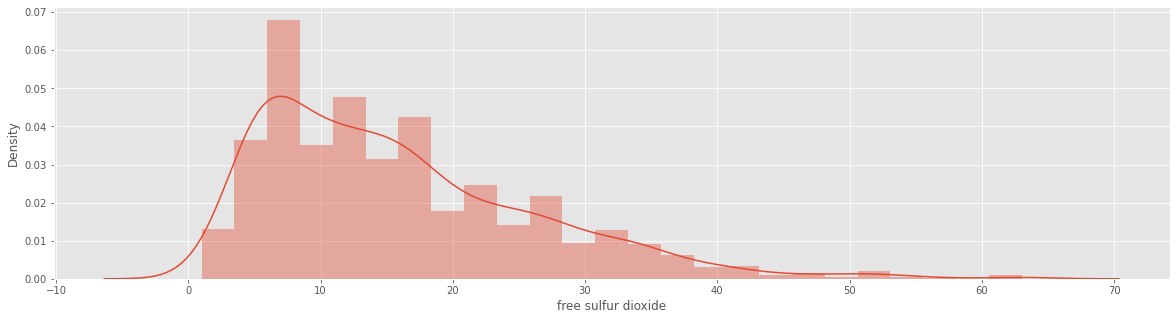

In [51]:
fixing_outliers('free sulfur dioxide')

# total sulfur dioxide

In [52]:
 df['total sulfur dioxide'].describe()

count    1359.000000
mean       46.825975
std        33.408946
min         6.000000
25%        22.000000
50%        38.000000
75%        63.000000
max       289.000000
Name: total sulfur dioxide, dtype: float64

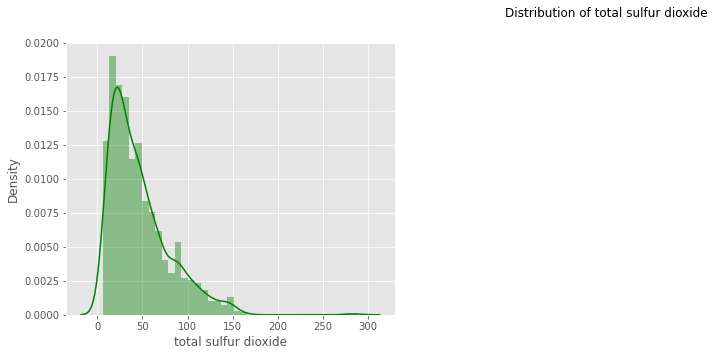

In [53]:
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.distplot(df['total sulfur dioxide'], color='green')
plt.suptitle('Distribution of total sulfur dioxide')
plt.show()

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

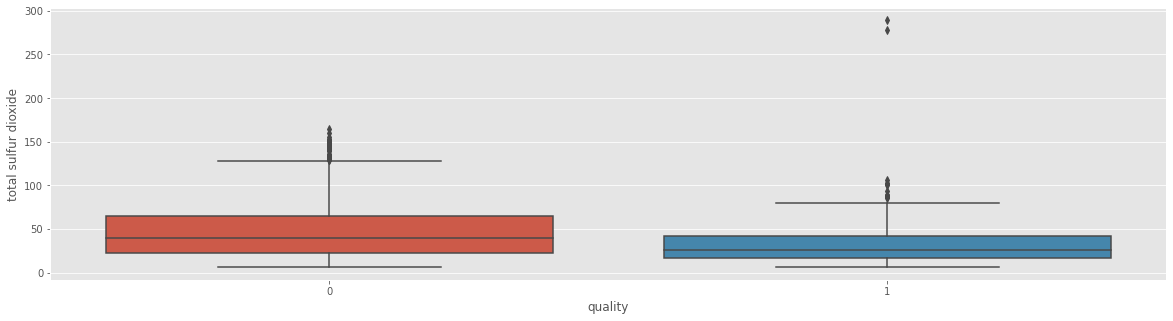

In [54]:
sns.boxplot(data=df, y= 'total sulfur dioxide', x='quality')

count     45.000000
mean     146.644444
std       31.389891
min      125.000000
25%      133.000000
50%      142.000000
75%      148.000000
max      289.000000
Name: total sulfur dioxide, dtype: float64

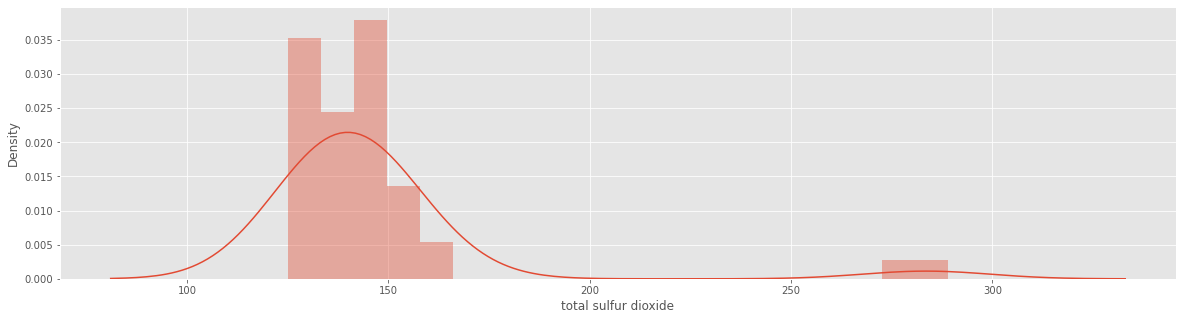

In [55]:
outlier_analysis('total sulfur dioxide')

Number of outliers that they are less than lower outer fence:  0 
Number of outliers that they are bigger than upper outer fence:  2


count    1359.000000
mean       46.682487
std        32.590231
min         6.000000
25%        22.000000
50%        38.000000
75%        63.000000
max       186.000000
Name: total sulfur dioxide, dtype: float64

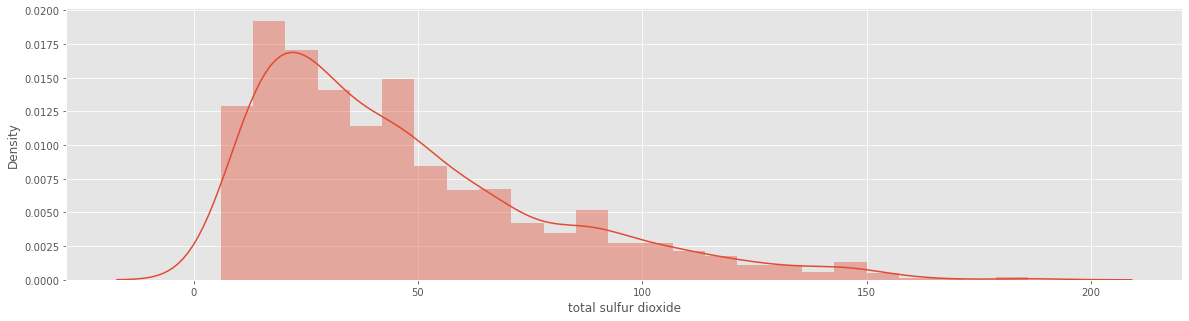

In [56]:
fixing_outliers('total sulfur dioxide')

# density

In [57]:
 df['density'].describe()

count    1359.000000
mean        0.996709
std         0.001869
min         0.990070
25%         0.995600
50%         0.996700
75%         0.997820
max         1.003690
Name: density, dtype: float64

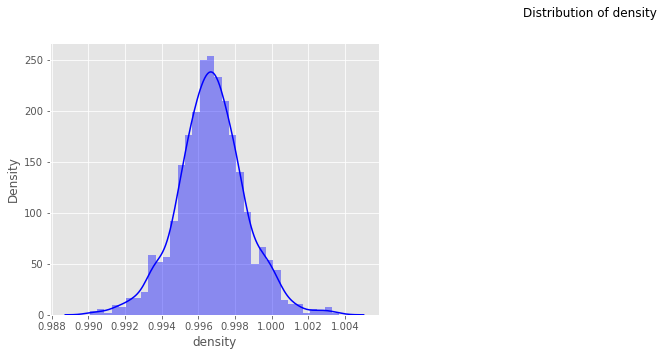

In [58]:
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.distplot(df['density'], color='blue')
plt.suptitle('Distribution of density')
plt.show()

<AxesSubplot:xlabel='quality', ylabel='density'>

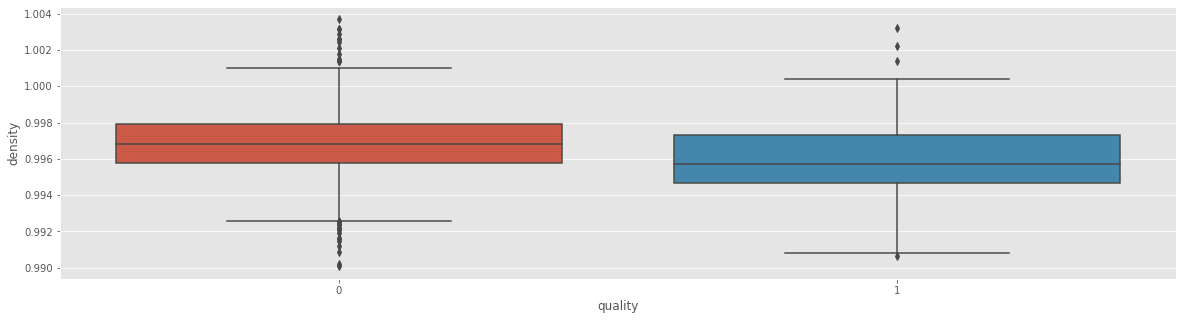

In [59]:
sns.boxplot(data=df, y= 'density', x='quality')

count    35.000000
mean      0.996675
std       0.005545
min       0.990070
25%       0.991585
50%       0.992200
75%       1.002150
max       1.003690
Name: density, dtype: float64

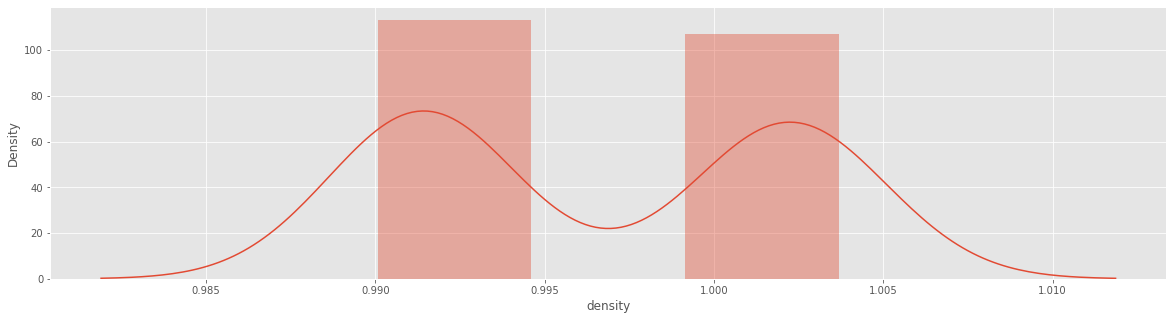

In [60]:
outlier_analysis('density')

Number of outliers that they are less than lower outer fence:  0 
Number of outliers that they are bigger than upper outer fence:  0


count    1359.000000
mean        0.996709
std         0.001869
min         0.990070
25%         0.995600
50%         0.996700
75%         0.997820
max         1.003690
Name: density, dtype: float64

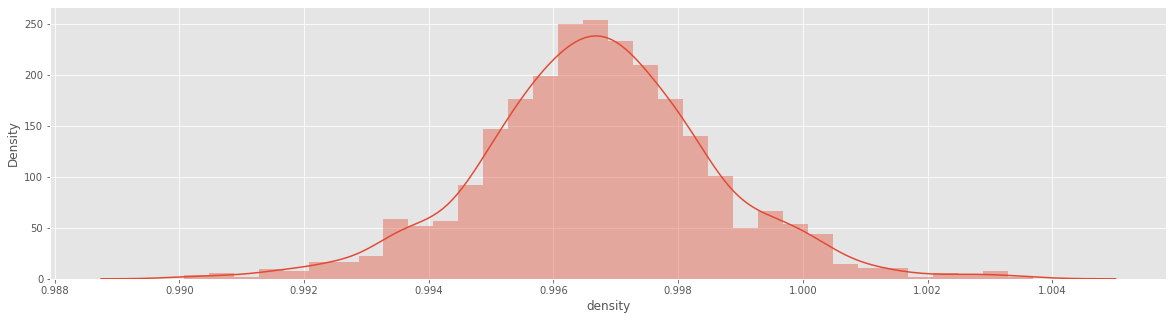

In [61]:
fixing_outliers('density')

# pH

In [62]:
 df['pH'].describe()

count    1359.000000
mean        3.309787
std         0.155036
min         2.740000
25%         3.210000
50%         3.310000
75%         3.400000
max         4.010000
Name: pH, dtype: float64

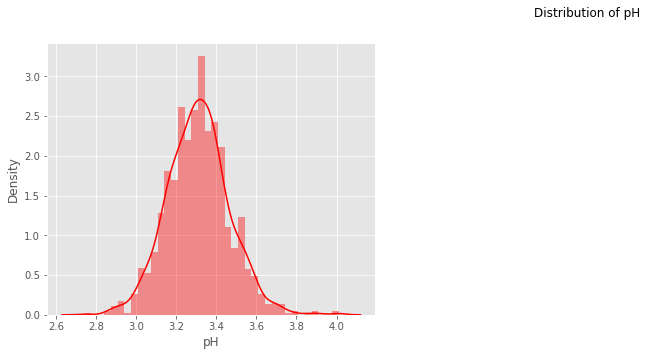

In [63]:
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.distplot(df['pH'], color='red')
plt.suptitle('Distribution of pH')
plt.show()

<AxesSubplot:xlabel='quality', ylabel='pH'>

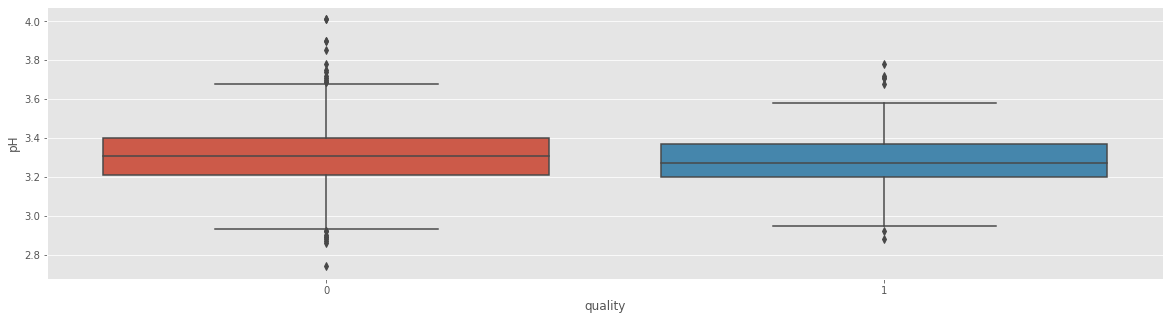

In [64]:
sns.boxplot(data=df, y= 'pH', x='quality')

count    28.000000
mean      3.430000
std       0.459871
min       2.740000
25%       2.897500
50%       3.705000
75%       3.757500
max       4.010000
Name: pH, dtype: float64

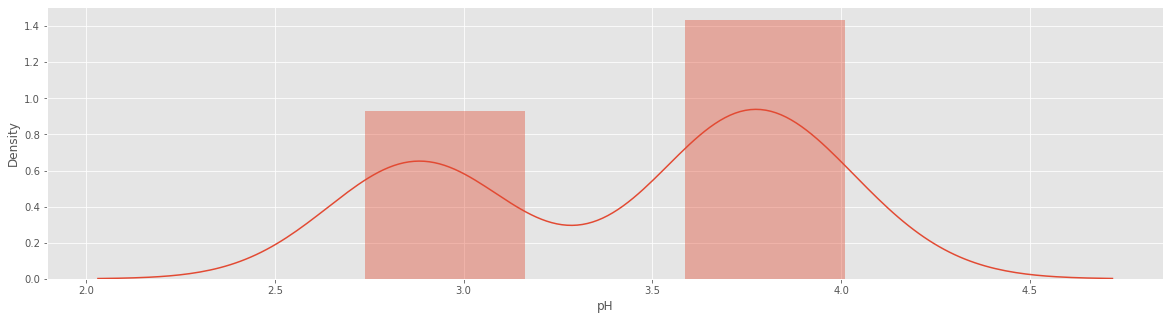

In [65]:
outlier_analysis('pH')

Number of outliers that they are less than lower outer fence:  0 
Number of outliers that they are bigger than upper outer fence:  2


count    1359.000000
mean        3.309728
std         0.154778
min         2.740000
25%         3.210000
50%         3.310000
75%         3.400000
max         3.970000
Name: pH, dtype: float64

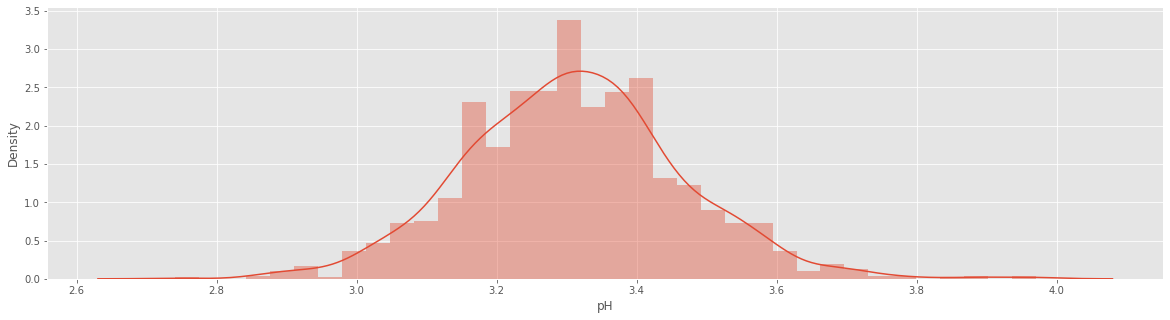

In [66]:
fixing_outliers('pH')

# sulphates

In [67]:
 df['sulphates'].describe()

count    1359.000000
mean        0.658705
std         0.170667
min         0.330000
25%         0.550000
50%         0.620000
75%         0.730000
max         2.000000
Name: sulphates, dtype: float64

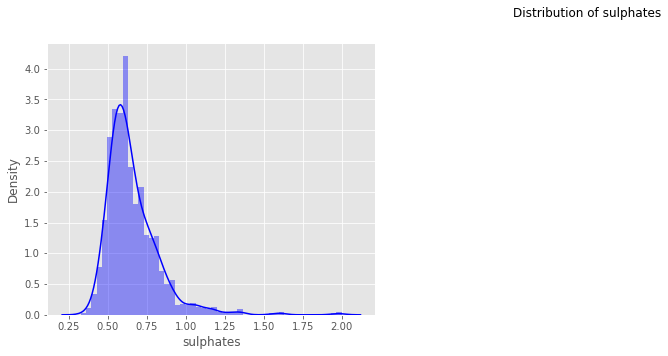

In [68]:
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.distplot(df['sulphates'], color='blue')
plt.suptitle('Distribution of sulphates')
plt.show()

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

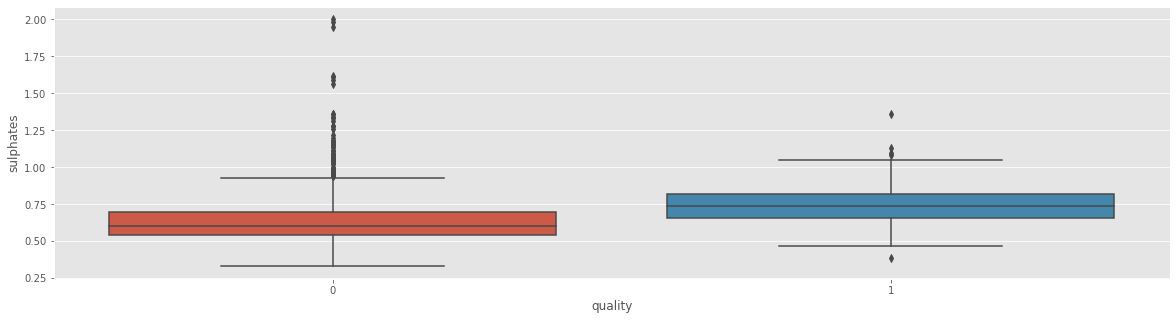

In [69]:
sns.boxplot(data=df, y= 'sulphates', x='quality')

count    55.000000
mean      1.216000
std       0.241029
min       1.000000
25%       1.060000
50%       1.140000
75%       1.280000
max       2.000000
Name: sulphates, dtype: float64

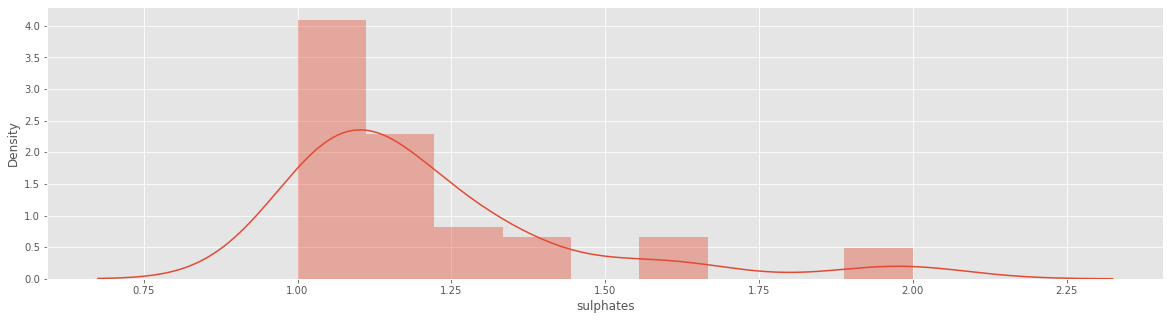

In [70]:
outlier_analysis('sulphates')

Number of outliers that they are less than lower outer fence:  0 
Number of outliers that they are bigger than upper outer fence:  15


count    1359.000000
mean        0.655850
std         0.155511
min         0.330000
25%         0.550000
50%         0.620000
75%         0.730000
max         1.270000
Name: sulphates, dtype: float64

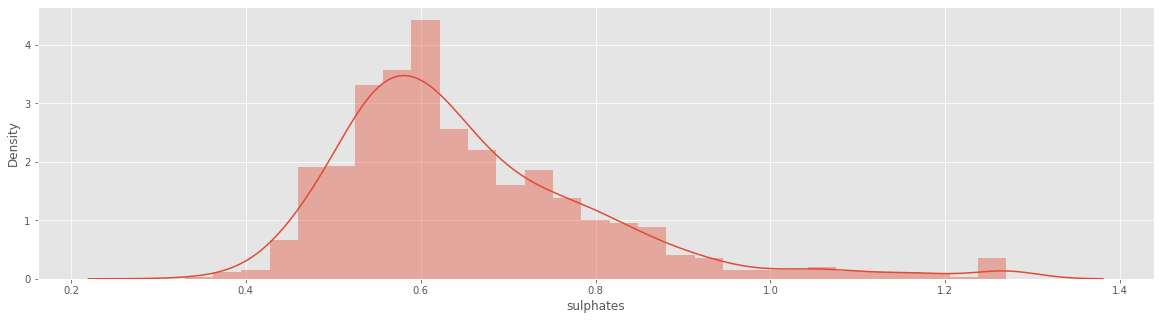

In [71]:
fixing_outliers('sulphates')

# alcohol

In [72]:
 df['alcohol'].describe()

count    1359.000000
mean       10.432315
std         1.082065
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64

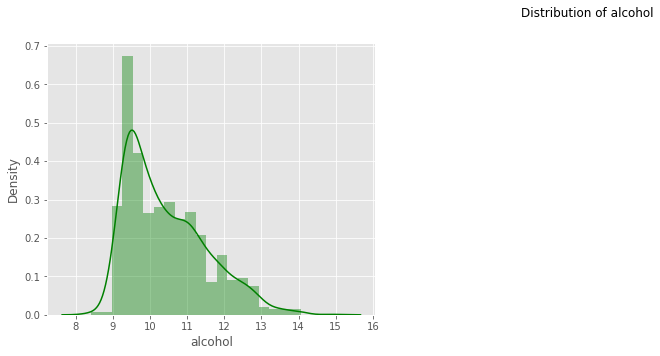

In [73]:
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.distplot(df['alcohol'], color='green')
plt.suptitle('Distribution of alcohol')
plt.show()

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

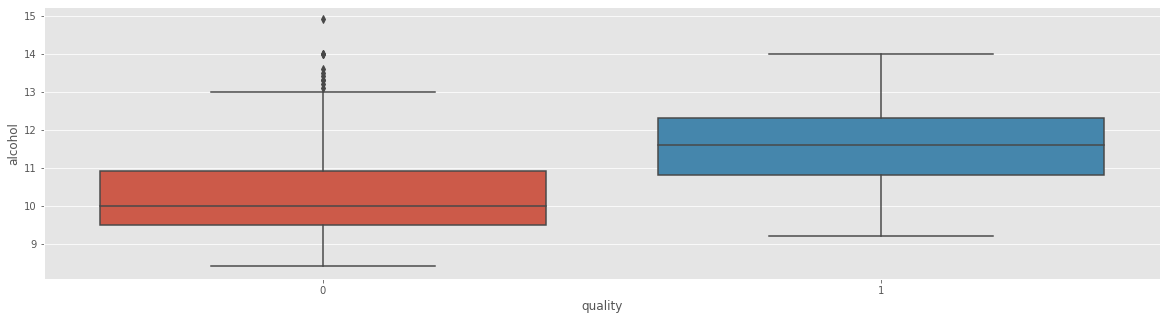

In [74]:
sns.boxplot(data=df, y= 'alcohol', x='quality')

count    12.000000
mean     13.905556
std       0.373039
min      13.566667
25%      13.600000
50%      14.000000
75%      14.000000
max      14.900000
Name: alcohol, dtype: float64

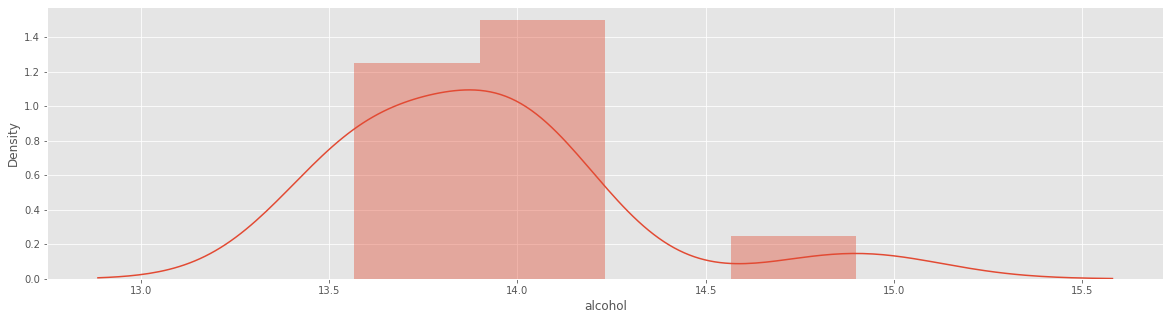

In [75]:
outlier_analysis('alcohol')

Number of outliers that they are less than lower outer fence:  0 
Number of outliers that they are bigger than upper outer fence:  0


count    1359.000000
mean       10.432315
std         1.082065
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64

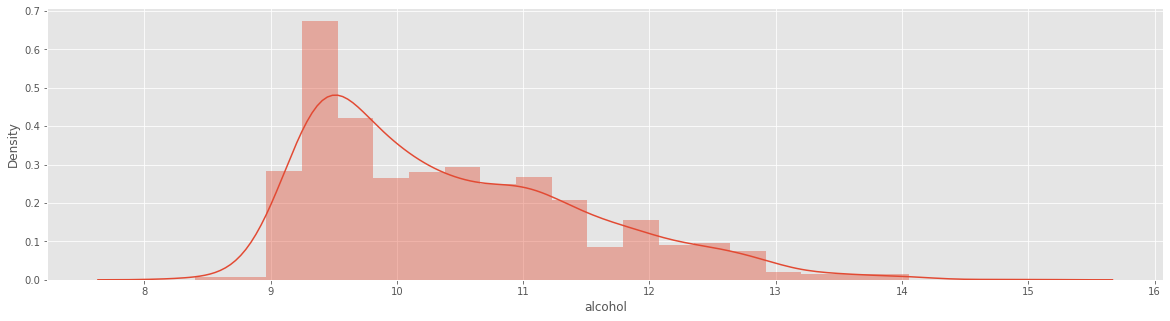

In [76]:
fixing_outliers('alcohol')

# Correlations

In [77]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256016,0.667675,0.188142,0.180146,-0.140180,-0.105547,0.670542,-0.687324,0.206177,-0.062420,0.116222
volatile acidity,-0.256016,1.000000,-0.552392,0.037428,0.128122,-0.020027,0.080231,0.024839,0.247135,-0.280334,-0.198938,-0.268114
citric acid,0.667675,-0.552392,1.000000,0.170502,0.157950,-0.047817,0.039361,0.357962,-0.550699,0.340381,0.105108,0.203561
residual sugar,0.188142,0.037428,0.170502,1.000000,0.128529,0.101385,0.156659,0.383419,-0.095228,0.001730,0.114335,0.075465
chlorides,0.180146,0.128122,0.157950,0.128529,1.000000,-0.001286,0.084090,0.353095,-0.269212,0.224313,-0.290825,-0.143746
free sulfur dioxide,-0.140180,-0.020027,-0.047817,0.101385,-0.001286,1.000000,0.675334,-0.018990,0.056726,0.049015,-0.080157,-0.072719
total sulfur dioxide,-0.105547,0.080231,0.039361,0.156659,0.084090,0.675334,1.000000,0.088471,-0.072842,0.017080,-0.230906,-0.150421
density,0.670542,0.024839,0.357962,0.383419,0.353095,-0.018990,0.088471,1.000000,-0.355371,0.152488,-0.504995,-0.158052
pH,-0.687324,0.247135,-0.550699,-0.095228,-0.269212,0.056726,-0.072842,-0.355371,1.000000,-0.192252,0.213047,-0.054071
sulphates,0.206177,-0.280334,0.340381,0.001730,0.224313,0.049015,0.017080,0.152488,-0.192252,1.000000,0.114621,0.227217


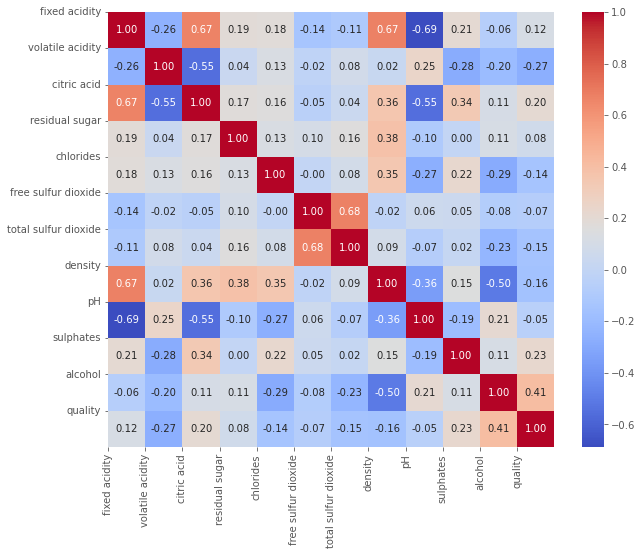

In [78]:
corr = df.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

# Spliting the dataset

In [79]:
X = df.drop('quality', axis = 1)
y = df['quality']


In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.20)
X_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1133,7.2,0.48,0.07,4.7,0.089,10.0,18.0,0.99684,3.37,0.68,11.2
760,9.0,0.58,0.25,2.8,0.075,9.0,104.0,0.99779,3.23,0.57,9.7
1173,7.6,0.36,0.31,1.7,0.079,26.0,65.0,0.99716,3.46,0.62,9.5
1079,7.9,0.30,0.68,4.7,0.050,37.5,186.0,0.99316,3.01,0.51,12.3
935,8.8,0.30,0.38,2.3,0.060,19.0,72.0,0.99543,3.39,0.72,11.8


In [81]:
y_test.head()

1133    1
760     0
1173    0
1079    1
935     0
Name: quality, dtype: int32

In [82]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)

In [83]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [84]:
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [85]:
model.intercept_

array([-3.11925956])

In [86]:
model.coef_

array([[ 5.35512710e-01, -4.40445385e-01, -1.85635125e-01,
         2.58083013e-01, -2.87367107e-01,  2.63700839e-02,
        -6.55478741e-01, -3.07719876e-01, -9.39285688e-04,
         8.68186385e-01,  1.05996630e+00]])

In [87]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


In [88]:
X_test_scaled = sc.transform(X_test)

In [89]:
model.predict_proba(X_test_scaled)

array([[7.29075214e-01, 2.70924786e-01],
       [9.95115249e-01, 4.88475083e-03],
       [9.90707307e-01, 9.29269340e-03],
       [9.53724912e-01, 4.62750885e-02],
       [6.90316553e-01, 3.09683447e-01],
       [9.61181042e-01, 3.88189585e-02],
       [9.31153454e-01, 6.88465463e-02],
       [9.31179123e-01, 6.88208769e-02],
       [9.97682510e-01, 2.31748988e-03],
       [8.13164202e-01, 1.86835798e-01],
       [9.87534677e-01, 1.24653228e-02],
       [6.06146536e-01, 3.93853464e-01],
       [9.48803724e-01, 5.11962763e-02],
       [9.94906097e-01, 5.09390252e-03],
       [3.41858963e-01, 6.58141037e-01],
       [9.57409625e-01, 4.25903752e-02],
       [6.92864872e-01, 3.07135128e-01],
       [8.63919812e-01, 1.36080188e-01],
       [9.96061772e-01, 3.93822793e-03],
       [9.65840106e-01, 3.41598940e-02],
       [9.27274987e-01, 7.27250125e-02],
       [9.98727381e-01, 1.27261914e-03],
       [8.46694520e-01, 1.53305480e-01],
       [3.33968706e-01, 6.66031294e-01],
       [9.594147

In [90]:
probabilities_test = model.predict_proba(X_test_scaled)[:,1]
probabilities_test[10:20]

array([0.01246532, 0.39385346, 0.05119628, 0.0050939 , 0.65814104,
       0.04259038, 0.30713513, 0.13608019, 0.00393823, 0.03415989])

In [91]:
probabilities_test = model.predict_proba(X_test_scaled)[:,0]
probabilities_test[10:20]

array([0.98753468, 0.60614654, 0.94880372, 0.9949061 , 0.34185896,
       0.95740962, 0.69286487, 0.86391981, 0.99606177, 0.96584011])

In [92]:
y_predict = model.predict(X_test_scaled)
y_predict[10:20]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [93]:
model.score(X_test_scaled,y_test)

0.8272058823529411

In [94]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,y_predict)

0.8272058823529411

In [95]:
cm1 = confusion_matrix(y_test,y_predict)
cm1

array([[214,  18],
       [ 29,  11]], dtype=int64)

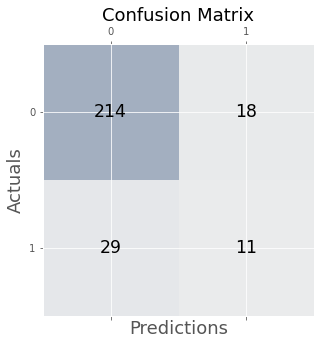

In [96]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_predict)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [97]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       232
           1       0.38      0.28      0.32        40

    accuracy                           0.83       272
   macro avg       0.63      0.60      0.61       272
weighted avg       0.81      0.83      0.82       272



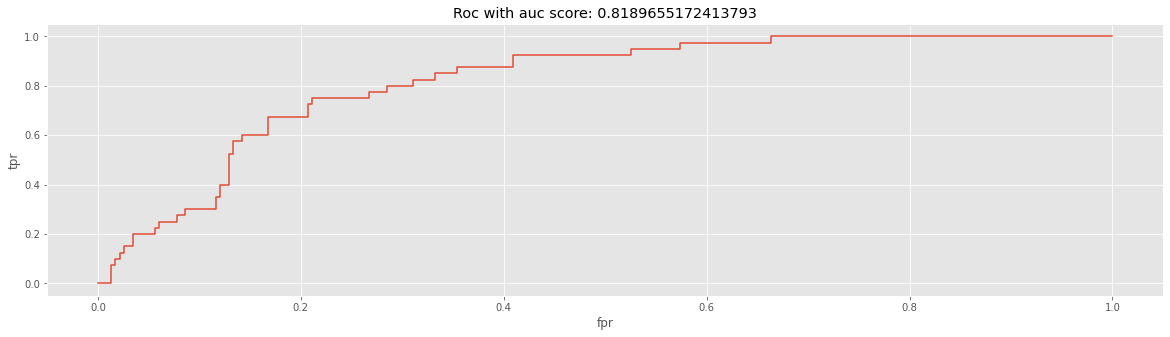

In [98]:
from sklearn.metrics import roc_auc_score, roc_curve
y_pred_prob = model.predict_proba(X_test_scaled)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
import  matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Roc with auc score: {}'.format(roc_auc_score(y_test,y_pred_prob)))
plt.show()